
# Importing the Packages

In [3]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [4]:
# importing the data wherev header is not given and it is space sperated text and 1st column is index.
df=pd.read_csv(r"C:\Users\DELL\Downloads\IndianLiverPatientData.txt", header=None, delimiter= ' *\t *',index_col=0)

In [5]:
df

,1,2,3,4,5,6,7,8,9,10,11
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No
...,...,...,...,...,...,...,...,...,...,...,...
579,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,Yes
580,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,No
581,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,No


In [6]:
#cheching for the shape of the data frame
df.shape

(583, 11)

In [7]:
#Giving the dataframe the column names
df.columns=['Age','Gender','Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase',
'Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin',
'Albumin_and_Globulin_Ratio','Class']

In [8]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,,,,,,,,,,,
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,No
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,No
3,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,No
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,No
5,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,No


# Checking for the outlier

In [9]:
import matplotlib.pyplot as plt
df.boxplot()
plt.show()


<Figure size 640x480 with 1 Axes>

# Checking Outlier for Individual Variable

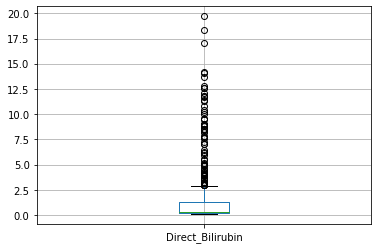

In [10]:
df.boxplot(column="Direct_Bilirubin")

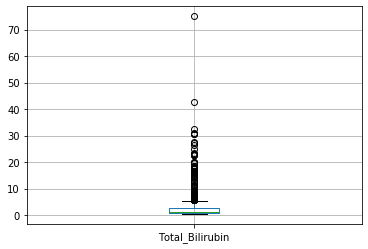

In [11]:
df.boxplot(column="Total_Bilirubin")

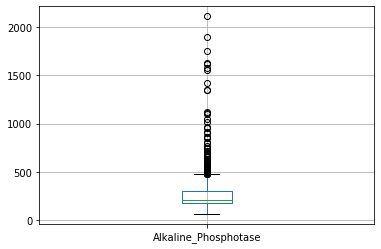

In [12]:
df.boxplot(column="Alkaline_Phosphotase")

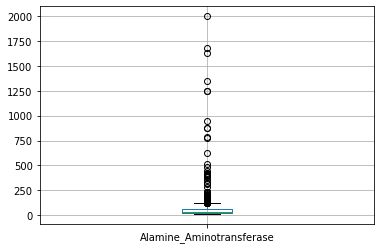

In [13]:
df.boxplot(column="Alamine_Aminotransferase")

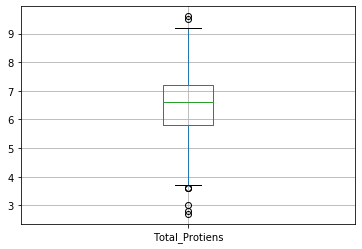

In [14]:
df.boxplot(column="Total_Protiens")

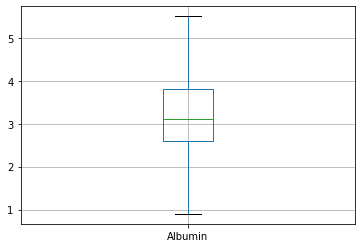

In [15]:

df.boxplot(column="Albumin")

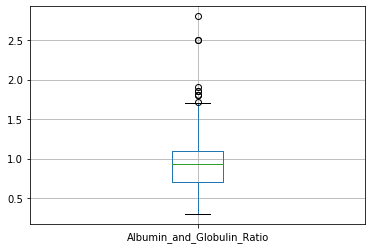

In [16]:
df.boxplot(column="Albumin_and_Globulin_Ratio")

# Checking for the missing values.

In [17]:
df.isnull().sum()

Age                            0
Gender                        20
Total_Bilirubin                0
Direct_Bilirubin               0
Alkaline_Phosphotase           0
Alamine_Aminotransferase       0
Aspartate_Aminotransferase     0
Total_Protiens                15
Albumin                        0
Albumin_and_Globulin_Ratio     4
Class                          0
dtype: int64

In [22]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)

In [23]:
for value in ["Albumin_and_Globulin_Ratio","Total_Protiens"]:
    df[value].fillna(df[value].mode()[0],inplace=True)

In [24]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Class                         0
dtype: int64

In [219]:
#created an array which stoes the variable which has the data type as object
colname=[]
for x in df.columns:
    if df[x].dtype=="object":
        colname.append(x)
colname

['Gender', 'Class']

In [220]:
# Label encoder is used to convert the Categorical data into numerical data
from sklearn import preprocessing 
le=preprocessing.LabelEncoder()
for x in colname:
    df[x]=le.fit_transform(df[x])

In [221]:
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Class
0,,,,,,,,,,,
1,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
2,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
3,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
4,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
5,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0
6,46,1,1.8,0.7,208,19,14,7.6,4.4,1.30,0
7,26,0,0.9,0.2,154,16,12,7.0,3.5,1.00,0
8,29,0,0.9,0.3,202,14,11,6.7,3.6,1.10,0
9,17,1,0.9,0.3,202,22,19,7.4,4.1,1.20,1


# Creating X and Y variable of the data

In [222]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
Y=Y.astype(int)

In [223]:
X.shape

(583, 10)

# Scaling the data

In [224]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
X

array([[ 1.25209764, -1.76228085, -0.41887783, ...,  0.30646825,
         0.19896867, -0.14902528],
       [ 1.06663704,  0.56744644,  1.22517135, ...,  0.95957369,
         0.07315659, -0.65177676],
       [ 1.06663704,  0.56744644,  0.6449187 , ...,  0.4930698 ,
         0.19896867, -0.18044725],
       ...,
       [ 0.44843504,  0.56744644, -0.4027597 , ..., -0.06673486,
         0.07315659,  0.16519439],
       [-0.84978917,  0.56744644, -0.32216906, ...,  0.30646825,
         0.32478075,  0.16519439],
       [-0.41704777,  0.56744644, -0.37052344, ...,  0.77297214,
         1.58290153,  1.73629275]])

In [225]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# Logistic Regression

In [226]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))
print(classifier.coef_)#coef is used to know the value of the coefficient which is nothing but the change in the value with the value change
print(classifier.intercept_)

[[-0.40646699 -0.01187005 -0.27458957 -0.84001423 -0.37925855 -1.19746557
  -0.7660016  -0.46498272  0.55011611 -0.13030448]]
[-1.62840828]


In [227]:
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[7.39531790e-01 2.60468210e-01]
 [9.86843392e-01 1.31566076e-02]
 [3.95872912e-01 6.04127088e-01]
 [8.30774337e-01 1.69225663e-01]
 [6.30956915e-01 3.69043085e-01]
 [5.33775227e-01 4.66224773e-01]
 [5.31787525e-01 4.68212475e-01]
 [9.00313949e-01 9.96860509e-02]
 [6.46063204e-01 3.53936796e-01]
 [9.99999286e-01 7.13702228e-07]
 [9.96233116e-01 3.76688388e-03]
 [4.39861884e-01 5.60138116e-01]
 [7.86531366e-01 2.13468634e-01]
 [6.57445941e-01 3.42554059e-01]
 [8.62546033e-01 1.37453967e-01]
 [9.88108003e-01 1.18919974e-02]
 [4.00529862e-01 5.99470138e-01]
 [7.18939802e-01 2.81060198e-01]
 [9.11504080e-01 8.84959202e-02]
 [7.50255086e-01 2.49744914e-01]
 [5.04953955e-01 4.95046045e-01]
 [7.52034446e-01 2.47965554e-01]
 [7.59548123e-01 2.40451877e-01]
 [3.88252631e-01 6.11747369e-01]
 [7.25346534e-01 2.74653466e-01]
 [7.52243666e-01 2.47756334e-01]
 [7.23347969e-01 2.76652031e-01]
 [7.28920682e-01 2.71079318e-01]
 [9.99871842e-01 1.28157892e-04]
 [6.18701558e-01 3.81298442e-01]
 [8.121160

In [228]:
#0---->No
#1---->yes.

In [229]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[114  12]
 [ 40   9]]
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       126
           1       0.43      0.18      0.26        49

    accuracy                           0.70       175
   macro avg       0.58      0.54      0.54       175
weighted avg       0.65      0.70      0.66       175

Accracy of the model: 0.7028571428571428


# adjusting the threshold

In [230]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
    cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 57  , type 2 error : 32  , type 1 error: 25
Errors at threshold  0.41000000000000003 : 56  , type 2 error : 33  , type 1 error: 23
Errors at threshold  0.42000000000000004 : 55  , type 2 error : 35  , type 1 error: 20
Errors at threshold  0.43000000000000005 : 56  , type 2 error : 36  , type 1 error: 20
Errors at threshold  0.44000000000000006 : 55  , type 2 error : 36  , type 1 error: 19
Errors at threshold  0.45000000000000007 : 55  , type 2 error : 36  , type 1 error: 19
Errors at threshold  0.4600000000000001 : 55  , type 2 error : 37  , type 1 error: 18
Errors at threshold  0.4700000000000001 : 53  , type 2 error : 38  , type 1 error: 15
Errors at threshold  0.4800000000000001 : 51  , type 2 error : 38  , type 1 error: 13
Errors at threshold  0.4900000000000001 : 50  , type 2 error : 38  , type 1 error: 12
Errors at threshold  0.5000000000000001 : 52  , type 2 error : 40  , type 1 error: 12
Errors at threshold  0.5100000000000001 : 51  , type 2 error : 4

In [231]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value >0.57:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [232]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[114  12]
 [ 40   9]]
Classification report:
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       126
           1       0.43      0.18      0.26        49

    accuracy                           0.70       175
   macro avg       0.58      0.54      0.54       175
weighted avg       0.65      0.70      0.66       175

Accracy of the model: 0.7028571428571428


In [233]:
Y.value_counts()

0    416
1    167
Name: Class, dtype: int64

# Upsampling the data

In [234]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = df[df.Class==0]
df_minority = df[df.Class==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
replace=True, # sample with replacement
n_samples=416, # to match majority class
random_state=10) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled.Class.value_counts()

1    416
0    416
Name: Class, dtype: int64

# Creating X And Y on upsampled data

In [235]:
X=df_upsampled.values[:,:-1]
Y=df_upsampled.values[:,-1]
X

array([[65.  ,  0.  ,  0.7 , ...,  6.8 ,  3.3 ,  0.9 ],
       [62.  ,  1.  , 10.9 , ...,  7.5 ,  3.2 ,  0.74],
       [62.  ,  1.  ,  7.3 , ...,  7.  ,  3.3 ,  0.89],
       ...,
       [41.  ,  0.  ,  0.9 , ...,  7.6 ,  3.8 ,  1.  ],
       [30.  ,  0.  ,  0.8 , ...,  7.9 ,  4.5 ,  1.3 ],
       [35.  ,  1.  ,  0.9 , ...,  6.4 ,  3.6 ,  1.2 ]])

In [236]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[ 1.31929811 -1.73762012 -0.36813594 ...  0.26926117  0.12505717
  -0.20620087]
 [ 1.13104244  0.57549978  1.55193588 ...  0.91887886  0.00192396
  -0.71584551]
 [ 1.13104244  0.57549978  0.87426347 ...  0.45486623  0.12505717
  -0.23805366]
 ...
 [-0.18674721 -1.73762012 -0.33048747 ...  1.01168138  0.74072321
   0.11232703]
 [-0.87701797 -1.73762012 -0.34931171 ...  1.29008896  1.60265568
   1.06791072]
 [-0.56325853  0.57549978 -0.33048747 ... -0.10194893  0.4944568
   0.74938282]]


In [237]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

# Logistic Regression On upsampled data

In [238]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))
print(classifier.coef_)#coef is used to know the value of the coefficient which is nothing but the change in the value with the value change
print(classifier.intercept_)

[[-0.39993428  0.05188035 -0.32275944 -0.95320255 -0.20368103 -1.58843149
  -0.85348785 -0.19373896  0.25520743 -0.13609385]]
[-0.51741148]


In [239]:
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[2.24372349e-01 7.75627651e-01]
 [9.99631113e-01 3.68886763e-04]
 [4.88740240e-01 5.11259760e-01]
 [2.18506102e-01 7.81493898e-01]
 [2.47915849e-01 7.52084151e-01]
 [5.18172789e-01 4.81827211e-01]
 [3.69562602e-01 6.30437398e-01]
 [4.31324826e-01 5.68675174e-01]
 [6.69262057e-01 3.30737943e-01]
 [9.96379818e-01 3.62018172e-03]
 [3.34862489e-01 6.65137511e-01]
 [3.38912010e-01 6.61087990e-01]
 [3.49300139e-01 6.50699861e-01]
 [5.43513254e-01 4.56486746e-01]
 [7.96039229e-01 2.03960771e-01]
 [2.87515126e-01 7.12484874e-01]
 [4.18448372e-01 5.81551628e-01]
 [2.63407965e-01 7.36592035e-01]
 [3.29817670e-01 6.70182330e-01]
 [5.42586798e-01 4.57413202e-01]
 [5.04725021e-01 4.95274979e-01]
 [2.72673814e-01 7.27326186e-01]
 [3.02319227e-01 6.97680773e-01]
 [4.80823090e-01 5.19176910e-01]
 [4.18448372e-01 5.81551628e-01]
 [9.77812116e-01 2.21878839e-02]
 [7.65070698e-01 2.34929302e-01]
 [3.73404542e-01 6.26595458e-01]
 [2.66339994e-01 7.33660006e-01]
 [4.85830020e-01 5.14169980e-01]
 [5.788057

In [240]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[72 58]
 [21 99]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.77      0.55      0.65       130
         1.0       0.63      0.82      0.71       120

    accuracy                           0.68       250
   macro avg       0.70      0.69      0.68       250
weighted avg       0.71      0.68      0.68       250

Accracy of the model: 0.684


# adjusting the threshold

In [241]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
    cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 77  , type 2 error : 5  , type 1 error: 72
Errors at threshold  0.41000000000000003 : 77  , type 2 error : 6  , type 1 error: 71
Errors at threshold  0.42000000000000004 : 77  , type 2 error : 7  , type 1 error: 70
Errors at threshold  0.43000000000000005 : 78  , type 2 error : 9  , type 1 error: 69
Errors at threshold  0.44000000000000006 : 77  , type 2 error : 9  , type 1 error: 68
Errors at threshold  0.45000000000000007 : 77  , type 2 error : 10  , type 1 error: 67
Errors at threshold  0.4600000000000001 : 81  , type 2 error : 15  , type 1 error: 66
Errors at threshold  0.4700000000000001 : 81  , type 2 error : 16  , type 1 error: 65
Errors at threshold  0.4800000000000001 : 82  , type 2 error : 17  , type 1 error: 65
Errors at threshold  0.4900000000000001 : 80  , type 2 error : 18  , type 1 error: 62
Errors at threshold  0.5000000000000001 : 79  , type 2 error : 21  , type 1 error: 58
Errors at threshold  0.5100000000000001 : 81  , type 2 error : 25  , 

In [242]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value >0.55:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
print(y_pred_class)

[1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]


In [243]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,y_pred_class))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,y_pred_class)
print("Accracy of the model:",acc)

[[82 48]
 [31 89]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.73      0.63      0.67       130
         1.0       0.65      0.74      0.69       120

    accuracy                           0.68       250
   macro avg       0.69      0.69      0.68       250
weighted avg       0.69      0.68      0.68       250

Accracy of the model: 0.684


# Decision Tree

In [244]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [245]:
Y_pred=model_DecisionTree.predict(X_test)
print(list(zip(Y_pred,Y_test)))

[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.

In [246]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[ 90  40]
 [ 11 109]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.89      0.69      0.78       130
         1.0       0.73      0.91      0.81       120

    accuracy                           0.80       250
   macro avg       0.81      0.80      0.79       250
weighted avg       0.81      0.80      0.79       250

Accracy of the model: 0.796


# Pruning the decision Tree

In [247]:
from sklearn.tree import DecisionTreeClassifier
model_DecisionTree=DecisionTreeClassifier(criterion="gini",min_samples_leaf=5,max_depth=10,random_state=10)
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [248]:
Y_pred=model_DecisionTree.predict(X_test)
print(list(zip(Y_pred,Y_test)))

[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.

In [249]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)
print("Accracy of the model:",acc)

[[87 43]
 [21 99]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.81      0.67      0.73       130
         1.0       0.70      0.82      0.76       120

    accuracy                           0.74       250
   macro avg       0.75      0.75      0.74       250
weighted avg       0.75      0.74      0.74       250

Accracy of the model: 0.744


# Neural Network

In [250]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=100,early_stopping=True,random_state=10,activation="relu")
mlp.fit(X_train,Y_train)
Y_pred=mlp.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (1.0, 0.0), (1.0, 0.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 1.0), (0.

In [251]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)#unneccessary dont prune the model on gud model coz if u do it would affect worse
print("Accracy of the model:",acc)

[[75 55]
 [29 91]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.72      0.58      0.64       130
         1.0       0.62      0.76      0.68       120

    accuracy                           0.66       250
   macro avg       0.67      0.67      0.66       250
weighted avg       0.67      0.66      0.66       250

Accracy of the model: 0.664


# KNN 

In [252]:
import numpy as np
#n_neighbors is passed to give the value of the K.
#k value is passed as the sqrt of the number of observation
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(round(np.sqrt(len(X_train)),0)),metric='manhattan')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (1.0, 0.0), (1.0, 0.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.

In [253]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)#unneccessary dont prune the model on gud model coz if u do it would affect worse
print("Accracy of the model:",acc)

[[ 61  69]
 [ 11 109]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.85      0.47      0.60       130
         1.0       0.61      0.91      0.73       120

    accuracy                           0.68       250
   macro avg       0.73      0.69      0.67       250
weighted avg       0.73      0.68      0.67       250

Accracy of the model: 0.68


In [254]:
from sklearn.metrics import accuracy_score

for K in range(1,50):
    model_KNN = KNeighborsClassifier(K,metric="euclidean")
    model_KNN.fit(X_train, Y_train)
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)

Accuracy is  0.824 for K-Value: 1
Accuracy is  0.76 for K-Value: 2
Accuracy is  0.704 for K-Value: 3
Accuracy is  0.7 for K-Value: 4
Accuracy is  0.704 for K-Value: 5
Accuracy is  0.7 for K-Value: 6
Accuracy is  0.692 for K-Value: 7
Accuracy is  0.696 for K-Value: 8
Accuracy is  0.696 for K-Value: 9
Accuracy is  0.68 for K-Value: 10
Accuracy is  0.7 for K-Value: 11
Accuracy is  0.696 for K-Value: 12
Accuracy is  0.724 for K-Value: 13
Accuracy is  0.704 for K-Value: 14
Accuracy is  0.688 for K-Value: 15
Accuracy is  0.68 for K-Value: 16
Accuracy is  0.684 for K-Value: 17
Accuracy is  0.68 for K-Value: 18
Accuracy is  0.68 for K-Value: 19
Accuracy is  0.684 for K-Value: 20
Accuracy is  0.68 for K-Value: 21
Accuracy is  0.684 for K-Value: 22
Accuracy is  0.688 for K-Value: 23
Accuracy is  0.68 for K-Value: 24
Accuracy is  0.704 for K-Value: 25
Accuracy is  0.708 for K-Value: 26
Accuracy is  0.708 for K-Value: 27
Accuracy is  0.696 for K-Value: 28
Accuracy is  0.672 for K-Value: 29
Accurac

# SVM

In [255]:
from sklearn import svm
svc_model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
svc_model.fit(X_train, Y_train)
Y_pred=svc_model.predict(X_test)
print(list(Y_pred))

[1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0,

In [256]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print("Classification report:")
print(classification_report(Y_test,Y_pred))#recall is accuracy score for individual class. class 0 is called as specificity or TNR, class 1 is called sensitivity or TPR
acc=accuracy_score(Y_test,Y_pred)#unneccessary dont prune the model on gud model coz if u do it would affect worse
print("Accracy of the model:",acc)

[[ 70  60]
 [ 17 103]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.80      0.54      0.65       130
         1.0       0.63      0.86      0.73       120

    accuracy                           0.69       250
   macro avg       0.72      0.70      0.69       250
weighted avg       0.72      0.69      0.68       250

Accracy of the model: 0.692


# Extra Tree Classifier

In [257]:
from sklearn.ensemble import ExtraTreesClassifier

model=ExtraTreesClassifier(30,random_state=10)
#fit the model on the data and predict the values
model=model.fit(X_train,Y_train)

Y_pred=model.predict(X_test)

In [258]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(confusion_matrix(Y_test,Y_pred))
print()
print(accuracy_score(Y_test,Y_pred))
print()
print(classification_report(Y_test,Y_pred))

[[116  14]
 [  9 111]]

0.908

              precision    recall  f1-score   support

         0.0       0.93      0.89      0.91       130
         1.0       0.89      0.93      0.91       120

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

